In [1]:
#import libraries and set seaborn styling
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tmdbsimple as tmdb
import requests
import pandas as pd
import time
import numpy as np
from ast import literal_eval
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
#from gensim import models
#from gensim.models import KeyedVectors
#import gensim

sns.set_context('talk')
sns.set_style('ticks')

In [3]:
import json
id_to_genre = json.load(open('dataset/id_to_genre.json'))

id_to_genre = {int(key):value for key, value in id_to_genre.items()} #convert string keys to int keys
id_to_genre

{12: 'Adventure',
 14: 'Fantasy',
 16: 'Animation',
 18: 'Drama',
 27: 'Horror',
 28: 'Action',
 35: 'Comedy',
 36: 'History',
 37: 'Western',
 53: 'Thriller',
 80: 'Crime',
 99: 'Documentary',
 878: 'Science Fiction',
 9648: 'Mystery',
 10402: 'Music',
 10749: 'Romance',
 10751: 'Family',
 10752: 'War',
 10770: 'TV Movie'}

In [5]:
movies = pd.read_csv('dataset/moviesData.csv', encoding='utf-8', converters={'tmdb_genres':literal_eval})

movies.release_date = pd.to_datetime(movies.release_date)
movies.head()

,tmdb_id,imdb_id,tmdb_genres,tmdb_plot,imdb_plot,popularity,release_date,title,vote_average,vote_count
0,278,tt0111161,"[18, 80]",Framed in the 1940s for the double murder of h...,Chronicles the experiences of a formerly succe...,34.346733,1994-09-23,The Shawshank Redemption,8.6,9913
1,238,tt0068646,"[18, 80]",Spanning the years 1945 to 1955 a chronicle o...,When the aging head of a famous crime family d...,39.079220,1972-03-14,The Godfather,8.5,7479
2,424,tt0108052,"[18, 36, 10752]",The true story of how businessman Oskar Schind...,Oskar Schindler is a vainglorious and greedy G...,21.613388,1993-11-29,Schindler's List,8.4,5626
3,240,tt0071562,"[18, 80]",In the continuing saga of the Corleone crime f...,The continuing saga of the Corleone crime fami...,34.872781,1974-12-20,The Godfather: Part II,8.4,4331
4,680,tt0110912,"[53, 80]",A burger loving hit man his philosophical par...,Jules Winnfield Samuel L Jackson and Vincen...,39.663864,1994-09-10,Pulp Fiction,8.3,11076


In [6]:
print('Title:\n', movies.title[12],
      '\n\nTMDB Plot:\n', movies.tmdb_plot[12], 
      '\n\nIMDB Plot:\n', movies.imdb_plot[12])

Title:
 Forrest Gump 

TMDB Plot:
 A man with a low IQ has accomplished great things in his life and been present during significant historic events   in each case  far exceeding what anyone imagined he could do  Yet  despite all the things he has attained  his one true love eludes him   Forrest Gump  is the story of a man who rose above his challenges  and who proved that determination  courage  and love are more important than ability  

IMDB Plot:
 Forrest Gump is a simple man with a low I Q  but good intentions  He is running through childhood with his best and only friend Jenny  His  mama  teaches him the ways of life and leaves him to choose his destiny  Forrest joins the army for service in Vietnam  finding new friends called Dan and Bubba  he wins medals  creates a famous shrimp fishing fleet  inspires people to jog  starts a ping pong craze  creates the smiley  writes bumper stickers and songs  donates to people and meets the president several times  However  this is all irrel

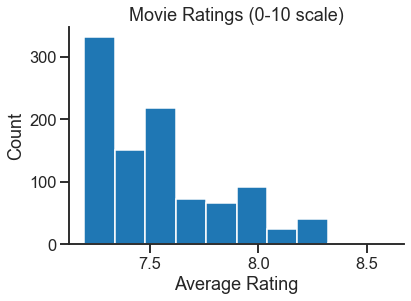

In [7]:
plt.hist(movies.vote_average)
plt.title('Movie Ratings (0-10 scale)')
plt.xlabel('Average Rating')
plt.ylabel('Count')
sns.despine()

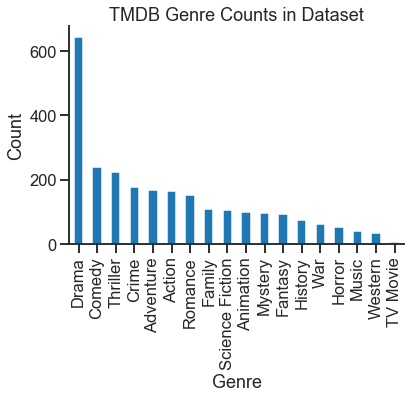

In [8]:
genre_list_ints = []
for sublist in list(movies.tmdb_genres):
    for item in sublist:
        genre_list_ints.append(item)

genre_list_strings = []
for genre in genre_list_ints:
    genre_list_strings.append(id_to_genre[genre])
    
genre_counts = Counter(genre_list_strings)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index')
genre_df.sort_values(by = 0, ascending=False).plot(kind='bar', legend=False)
plt.title('TMDB Genre Counts in Dataset')
plt.ylabel('Count')
plt.xlabel('Genre')
sns.despine()

Average TMDB Genres: 2.5355355355355353


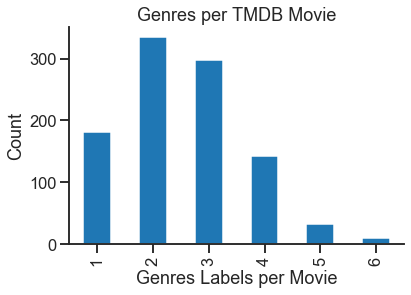

In [9]:
#count number of genres per movie
tmdb_num_genres_per_movie = [len(genres) for genres in movies.tmdb_genres]

#collect counts and plot for both imdb and tmdb
tmdb_num_genre_counts = Counter(tmdb_num_genres_per_movie)
tmdb_genre_counts_df = pd.DataFrame.from_dict(tmdb_num_genre_counts, orient='index')
tmdb_genre_counts_df = tmdb_genre_counts_df.sort_index()
tmdb_genre_counts_df.plot(kind='bar', legend=False)
plt.title('Genres per TMDB Movie')
plt.xlabel('Genres Labels per Movie')
plt.ylabel('Count')
sns.despine()

print('Average TMDB Genres:', np.mean(tmdb_num_genres_per_movie))

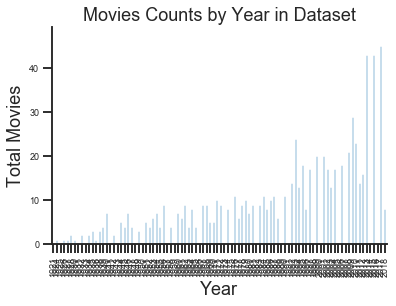

In [10]:
movie_years = [year.year for year in movies.release_date]
year_counts = Counter(movie_years)
year_df = pd.DataFrame.from_dict(year_counts, orient='index')
year_df.sort_index().plot(kind='bar', legend=False)
plt.title('Movies Counts by Year in Dataset')
plt.tick_params(labelsize=9)
plt.ylabel('Total Movies')
plt.xlabel('Year')
sns.despine()

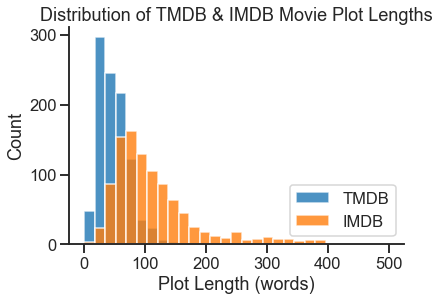

In [11]:
#tmdb lengths
tmdb_plot_lengths = []
for plot in movies.tmdb_plot:
    plot_length = len(plot.split())
    tmdb_plot_lengths.append(plot_length)
    
#imdb lengths
imdb_plot_lengths = []
for plot in movies.imdb_plot:
    plot_length = len(plot.split())
    imdb_plot_lengths.append(plot_length)
    
#plot tmdb lengths
bins = np.linspace(0, 500, 30)
plt.hist(tmdb_plot_lengths, bins, alpha = 0.8, label = 'TMDB')
plt.hist(imdb_plot_lengths, bins, alpha = 0.8, label = 'IMDB')
plt.xlabel('Plot Length (words)')
plt.ylabel('Count')
plt.title('Distribution of TMDB & IMDB Movie Plot Lengths')
plt.legend(loc='lower right')
sns.despine();

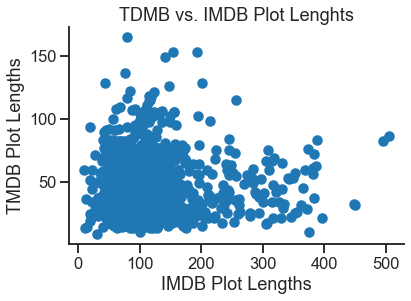

In [12]:
#scatter of TMDB vs IMDB plot lengths
plt.scatter(imdb_plot_lengths, tmdb_plot_lengths)
plt.title('TDMB vs. IMDB Plot Lenghts')
plt.xlabel('IMDB Plot Lengths')
plt.ylabel('TMDB Plot Lengths')
sns.despine();

In [13]:
print('Shortest and longest plots (words):')
print('TMDB: ', min(tmdb_plot_lengths),',', max(tmdb_plot_lengths))
print('Mean TMDB plot length:', np.mean(tmdb_plot_lengths))
print()
print('IMDB: ', min(imdb_plot_lengths),',', max(imdb_plot_lengths))
print('Mean IMDB plot length:', np.mean(imdb_plot_lengths))


Shortest and longest plots (words):
TMDB:  8 , 165
Mean TMDB plot length: 48.474474474474476

IMDB:  10 , 505
Mean IMDB plot length: 115.35035035035035


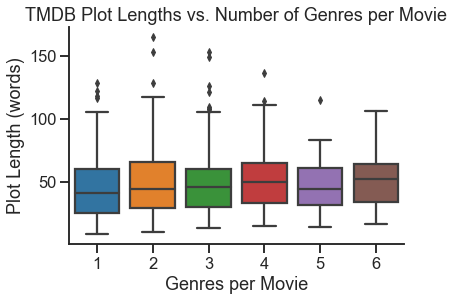

In [14]:
sns.boxplot(tmdb_num_genres_per_movie, tmdb_plot_lengths)
plt.title('TMDB Plot Lengths vs. Number of Genres per Movie')
plt.xlabel('Genres per Movie')
plt.ylabel('Plot Length (words)')
sns.despine()

In [19]:
movies['combined_plots'] = movies['tmdb_plot'] + ' ' + movies['imdb_plot']

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.005, 
                          stop_words = get_stop_words('en'))

tmdb_bow=tfidf_vectorizer.fit_transform(movies['tmdb_plot'])
imdb_bow=tfidf_vectorizer.fit_transform(movies['imdb_plot'])
combined_bow = tfidf_vectorizer.fit_transform(movies['combined_plots'])

#check shape of resulting matrices
tmdb_bow.shape, imdb_bow.shape, combined_bow.shape

/opt/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


((999, 1162), (999, 2436), (999, 3022))

In [24]:
#each plot is a row vector of the TFIDF sparse matrices
movies['tmdb_bow_plot'] = [plot for plot in tmdb_bow]
movies['imdb_bow_plot'] = [plot for plot in imdb_bow]
movies['combined_bow_plots'] = [plot for plot in combined_bow]

#resave movies csv
movies.to_csv('dataset/moviesData.csv', encoding="utf-8", index=False)

#save TFIDF matrices an numpy arrays
np.save('dataset/tmdb_bow.npy',tmdb_bow.toarray())
np.save('dataset/imdb_bow.npy',imdb_bow.toarray())
np.save('dataset/combined_bow.npy', combined_bow.toarray())

In [25]:
#define tokenizer
tokenizer = RegexpTokenizer(r'\w+')
#set stop words list
english_stop = get_stop_words('en')
print(len(english_stop))

#function to clean plots
def clean_plot(plot):
    '''
    clean_plot()
    -applies the following the plot of a movie:
        1) lowers all strings
        2) tokenizes each word
        3) removed English stop words

    -inputs: plot (string)
    
    -outputs: list representation of plot
    '''
    plot = plot.lower()
    plot = tokenizer.tokenize(plot)
    plot = [word for word in plot if word not in english_stop]
    return plot

174


In [26]:
#check function on first movie's clean plot
print(movies.tmdb_plot[0])
print(clean_plot(movies.tmdb_plot[0]))

Framed in the 1940s for the double murder of his wife and her lover  upstanding banker Andy Dufresne begins a new life at the Shawshank prison  where he puts his accounting skills to work for an amoral warden  During his long stretch in prison  Dufresne comes to be admired by the other inmates    including an older prisoner named Red    for his integrity and unquenchable sense of hope
['framed', '1940s', 'double', 'murder', 'wife', 'lover', 'upstanding', 'banker', 'andy', 'dufresne', 'begins', 'new', 'life', 'shawshank', 'prison', 'puts', 'accounting', 'skills', 'work', 'amoral', 'warden', 'long', 'stretch', 'prison', 'dufresne', 'comes', 'admired', 'inmates', 'including', 'older', 'prisoner', 'named', 'red', 'integrity', 'unquenchable', 'sense', 'hope']


In [27]:
#apply to movies df for both imdb and tmdb
movies['tmdb_clean_plot'] = movies['tmdb_plot'].apply(lambda x: clean_plot(x))
movies['imdb_clean_plot'] = movies['imdb_plot'].apply(lambda x: clean_plot(x))
movies['combined_clean_plot'] = movies['combined_plots'].apply(lambda x: clean_plot(x))

#check some outputs
movies.tmdb_clean_plot[1:5], movies.imdb_clean_plot[1:5], movies.combined_clean_plot[1:5]

(1    [spanning, years, 1945, 1955, chronicle, ficti...
 2    [true, story, businessman, oskar, schindler, s...
 3    [continuing, saga, corleone, crime, family, yo...
 4    [burger, loving, hit, man, philosophical, part...
 Name: tmdb_clean_plot, dtype: object,
 1    [aging, head, famous, crime, family, decides, ...
 2    [oskar, schindler, vainglorious, greedy, germa...
 3    [continuing, saga, corleone, crime, family, te...
 4    [jules, winnfield, samuel, l, jackson, vincent...
 Name: imdb_clean_plot, dtype: object,
 1    [spanning, years, 1945, 1955, chronicle, ficti...
 2    [true, story, businessman, oskar, schindler, s...
 3    [continuing, saga, corleone, crime, family, yo...
 4    [burger, loving, hit, man, philosophical, part...
 Name: combined_clean_plot, dtype: object)

In [28]:
from gensim import models

In [30]:
#Load the pretrained google news word2vec model
model = models.KeyedVectors.load_word2vec_format('dataset/GoogleNews-vectors-negative300.bin', binary=True)

In [31]:
#collect words not in the Google News w2v model
not_w2v = []

#word2vec function
def apply_words2Vec(cleaned_plot, mean=False):
    
    """
    apply_words2Vec()
    -applies the following transformations to the cleaned plot of a movie:
        1) removes words that are not in google's model
        2) creates a 300-dimension vector representation of each word
        3) outputes vector of vectors for plot
        If mean = True
        4) converts the resulting nd_array into a 1d_array via np.mean() and
           outputs single vector for each plot.
    -also keeps track of all words not found in google's model
    
    -inputs: cleaned_plot (string)
    
    -outputs: vector representation of plot
    
    """
    vecs=[]
    for word in cleaned_plot:
        #add word vector to list if it is in the google model
        try:
            vecs.append(model.word_vec(word)) 
        except:
            #if the word is not in the w2v model, add it to
            #our list of skipped words
            not_w2v.append(word)
    
    #take the column-wise mean of vecs to reduce nd_aray to 1d_array
    if mean == True:
        vecs = np.mean(vecs, axis=0)
        return vecs
    #return matrix of w2v arrays where each row is a word in the plot
    return np.stack(vecs)

In [32]:
#apply transformation to three sets of plots and add columns to df

#columns with mean w2v
movies['tmdb_w2v_plot_mean'] = movies['tmdb_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=True))
movies['imdb_w2v_plot_mean'] = movies['imdb_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=True))
movies['combined_w2v_plot_mean'] = movies['combined_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=True))

#columns with w2v matrix for each plot
movies['tmdb_w2v_plot_matrix'] = movies['tmdb_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=False))
movies['imdb_w2v_plot_matrix'] = movies['imdb_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=False))
movies['combined_w2v_plot_matrix'] = movies['combined_clean_plot'].apply(lambda x: apply_words2Vec(x, mean=False))

#check shapes of first movie vectors to confirm nd_array and 300-dimensions
print('Mean vector representations:')
print(movies.loc[0,'tmdb_w2v_plot_mean'].shape, 
      movies.loc[0,'imdb_w2v_plot_mean'].shape, 
      movies.loc[0, 'combined_w2v_plot_mean'].shape)

print('Matrix representations:')
print(movies.loc[0,'tmdb_w2v_plot_matrix'].shape, 
      movies.loc[0,'imdb_w2v_plot_matrix'].shape,
      movies.loc[0,'combined_w2v_plot_matrix'].shape)

Mean vector representations:
(300,) (300,) (300,)
Matrix representations:
(33, 300) (38, 300) (71, 300)


In [33]:
#print some of our skipped words
print(len(not_w2v))
np.random.seed(112)
print(np.random.choice(not_w2v, 50, replace=False))

21532
['deray' 'janeiro' 'verona' 'calloway' 'ferrante' 'griswolds' 'chiyo'
 'beaufort' 'brubaker' 'nitesh' 'lightyear' 'carvalho' 'manolo' 'onllwyn'
 'altaira' 'mulan' 'barrelled' 'nicodemus' '2009' 'emmett' 'claudio'
 'margo' 'pleakley' 'liesel' 'wwii' '04' 'claudio' 'saoirse' 'cristo'
 'augustine' 'chiyo' 'agu' 'connery' 'zakone' '60s' 'doris' 'thao' '21'
 'ultron' 'costillo' 'moonee' 'zorg' 'saroo' '60' 'clarice' 'matuschek'
 'a24' 'wigand' 'standish' '1327']


In [34]:
for plot in movies.tmdb_w2v_plot_mean:
    if len(plot) != 300:
        print("AH! no word2vec representation")
print('All TMDB movies have a word2vec representation.')

for plot in movies.imdb_w2v_plot_mean:
    if len(plot) != 300:
        print("AH! no word2vec representation")
print('All IMDB movies have a word2vec representation.')

All TMDB movies have a word2vec representation.
All IMDB movies have a word2vec representation.


In [36]:
#w2v mean vectors
np.save('dataset/tmdb_w2v_mean.npy', movies['tmdb_w2v_plot_mean'].as_matrix())
np.save('dataset/imdb_w2v_mean.npy', movies['imdb_w2v_plot_mean'].as_matrix())
np.save('dataset/combined_w2v_mean.npy', movies['combined_w2v_plot_mean'].as_matrix())

#w2v matrices
np.save('dataset/tmdb_w2v_matrix.npy', movies['tmdb_w2v_plot_matrix'].as_matrix())
np.save('dataset/imdb_w2v_matrix.npy', movies['imdb_w2v_plot_matrix'].as_matrix())
np.save('dataset/combined_w2v_matrix.npy', movies['combined_w2v_plot_matrix'].as_matrix())

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py

In [37]:
movies.to_csv('dataset/moviesData.csv', encoding="utf-8", index=False)